In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets #to get the dataset
from sklearn.model_selection import train_test_split #to split the data into training and testing data
from sklearn import metrics #used for model evaluation

In [4]:
#to load dataset
housing=sklearn.datasets.load_boston()

C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [6]:
housing

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
#converting the dataset to pandas dataframe to make it more structured
data=pd.DataFrame(housing.data)

In [8]:
data.head() #to view data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data.columns=housing.feature_names #to rename columns as they were

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#adding target column i.e price to dataframe
data['Price']=housing.target

In [13]:
#check shape
data.shape

(506, 14)

In [14]:
data.columns #to get name of columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [16]:
data.dtypes #datatypes present

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [17]:
#checking for null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [18]:
#to view data statistics
data.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98 

In [19]:
#finding correlations between features(columns)
co=data.corr()
co.shape

(14, 14)

<AxesSubplot:>

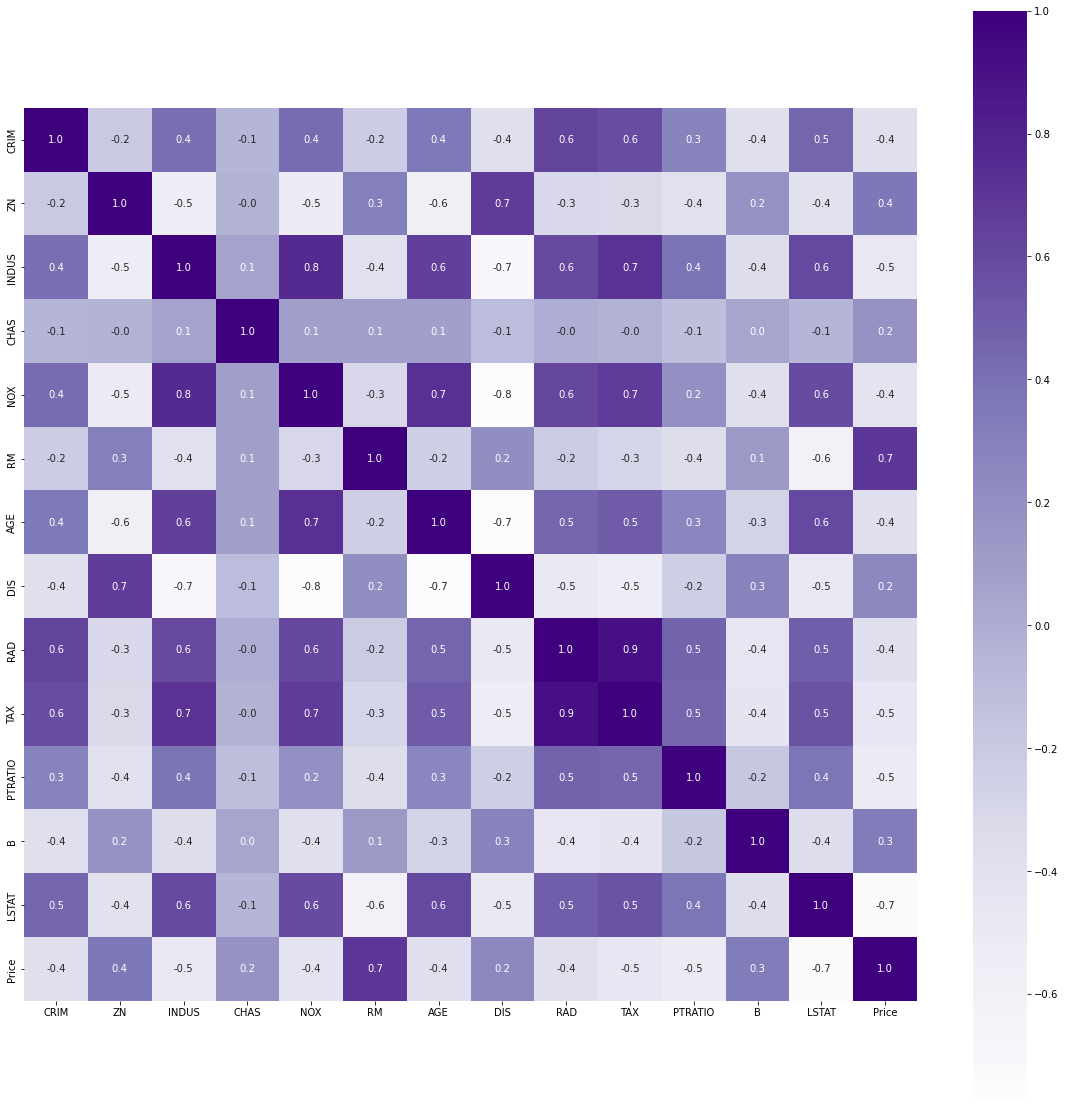

In [25]:
#plotting heat map for correlation
plt.figure(figsize=(20,20))
sns.heatmap(co,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Purples')

In [27]:
#splitting target variable and independent variables
x=data.drop(['Price'],axis=1) #for dropping column mention axis=1, for droppng row mention axis=0
y=data['Price']

In [54]:
#splittiong to training and testing data
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1)
#test size 0.2 means 20% of data will be test data and remaining 80% will be training data, random_state is given any number just for the way the splitting of data to be done
print(x.shape,x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


In [55]:
#training model using linear regression
#importing library for linear regression
from sklearn.linear_model import LinearRegression

In [56]:
#creating a linear regressor
ln=LinearRegression()

In [57]:
#train the model using training set

ln.fit(x_train,y_train)

LinearRegression()

In [58]:
#value of y-intercept
ln.intercept_

42.93352585337688

In [59]:
#converting the coefficient values of each feature into a dataframe 
coe=pd.DataFrame([x_train.columns,ln.coef_]).T # .T is for transposing it 
coe=coe.rename(columns={0:'Attribute',1:'Coefficients'})
coe

,Attribute,Coefficients
0,CRIM,-0.112387
1,ZN,0.058059
2,INDUS,0.018359
3,CHAS,2.129978
4,NOX,-19.581101
5,RM,3.095462
6,AGE,0.004453
7,DIS,-1.500476
8,RAD,0.305359
9,TAX,-0.011123


In [60]:
#MODEL EVALUATION
#model prediction on train data
y_pred=ln.predict(x_train)

In [61]:
#model evaluate
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7293585058196337
Adjusted R^2: 0.7203371226802882
MAE: 3.1961968073257374
MSE: 21.86279471487961
RMSE: 4.675766751547773


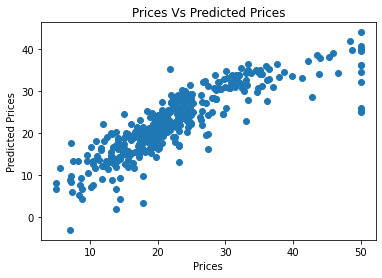

In [62]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices Vs Predicted Prices")
plt.show()

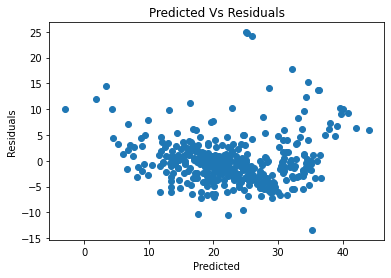

In [63]:
#checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted Vs Residuals")
plt.show()


In [64]:
#There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


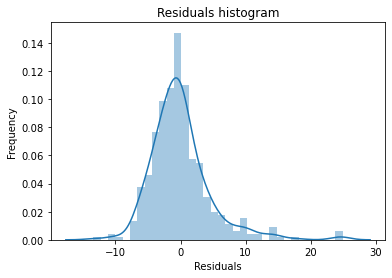

In [65]:
#checking normality of errors
sns.distplot(y_train-y_pred)
plt.title("Residuals histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [66]:
#Here the residuals are normally distributed. So normality assumption is satisfied

In [67]:
#FOR TEST DATA
#Predicting test data with the model
y_test_pred=ln.predict(x_test)

In [70]:
#model evaluation for test data

print('R^2:',metrics.r2_score(y_test, y_test_pred) )
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7634174432138501
Adjusted R^2: 0.728467747324987
MAE: 3.7507121808389146
MSE: 23.380836480269934
RMSE: 4.8353734582005075


In [ ]:
# the model evaluations scores for test data are almost matching with that of train data. So the model is not overfitting.